In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes
from OCT import OCTClassifier
import time
from sklearn.preprocessing import MinMaxScaler
from decision_tree_functions import *

1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.

Notes:
- Class label indicates divorce.

In [46]:
df = pd.read_csv('divorce/divorce.csv', delimiter=';')
y = df.Class
X = df.drop(columns='Class')

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,shuffle=True)

In [124]:
# akhilesh: use statmodel to fit
import statsmodels.api as sm
model = sm.Logit(y_train, sm.add_constant(X_train)) #Define the model; sm.add_constant(X) adds an intercept term to the model
# result = model.fit(maxiter=100,method='ncg') #Fit the model
result = model.fit_regularized(maxiter=100,method='l1',alpha=10) #Fit the model
result.summary() #Print summary



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.35416717522843966
            Iterations: 62
            Function evaluations: 65
            Gradient evaluations: 62


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  127
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            8
Date:                Sun, 06 Dec 2020   Pseudo R-squ.:                  0.7718
Time:                        19:34:21   Log-Likelihood:                -20.090
converged:                       True   LL-Null:                       -88.026
Covariance Type:            nonrobust   LLR p-value:                 1.711e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0        nan        nan        nan         nan         nan
Atr1                0        nan        nan        nan         nan         nan
Atr2                0        nan        nan        nan         nan         nan
Atr3                0        nan        nan        nan         nan         nan
Atr4                0        nan        nan        nan         nan         nan
Atr5                0        nan        nan        nan         nan         nan
Atr6                0        nan        nan        nan         nan         nan
Atr7                0        nan        nan        nan         nan         nan
Atr8                0        nan        nan        nan         nan         nan
Atr9           0.2237      0.668      0.335      0.738      -1.085       1.532
Atr10               0        nan        nan        nan         nan         nan
Atr11          0.3142      0.616      0.510      0.610      -0.892       1.521
Atr12               0        nan        nan        nan         nan         nan
Atr13               0        nan        nan        nan         nan         nan
Atr14               0        nan        nan        nan         nan         nan
Atr15               0        nan        nan        nan         nan         nan
Atr16               0        nan        nan        nan         nan         nan
Atr17               0        nan        nan        nan         nan         nan
Atr18          0.2316      0.693      0.334      0.738      -1.127       1.590
Atr19          0.1635      0.729      0.224      0.822      -1.265       1.592
Atr20               0        nan        nan        nan         nan         nan
Atr21               0        nan        nan        nan         nan         nan
Atr22               0        nan        nan        nan         nan         nan
Atr23               0        nan        nan        nan         nan         nan
Atr24               0        nan        nan        nan         nan         nan
Atr25               0        nan        nan        nan         nan         nan
Atr26               0        nan        nan        nan         nan         nan
Atr27               0        nan        nan        nan         nan         nan
Atr28               0        nan        nan        nan         nan         nan
Atr29               0        nan        nan        nan         nan         nan
Atr30               0        nan        nan        nan         nan         nan
Atr31               0        nan        nan        nan         nan         nan
Atr32               0        nan        nan        nan         nan         nan
Atr33               0        nan        nan        nan         nan         nan
Atr34               0        nan        nan        nan         nan         nan
Atr35               0        nan        nan        nan         nan         nan
Atr36          0.3053      0.468      0.653      0.514      -0.611       1.222
Atr37               0        nan        nan        nan         nan         nan
At

In [125]:
y_predict = model.predict(result.params,sm.add_constant(X_test)) 
# calculate accuracy scores
roc_auc= roc_auc_score(y_test, y_predict)
print("AUC:", roc_auc)

AUC: 0.9848484848484849


In [131]:
# use top 8 features
# Atr9, 11,15,17,18,19,20,40: 8,10,14,16,17,18,19,39
X_train_trimmed = X_train.iloc[:,[9,11,18,19,40]]
X_test_trimmed = X_test.iloc[:,[9,11,18,19,40]]

model = sm.Logit(y_train, sm.add_constant(X_train_trimmed)) #Define the model; sm.add_constant(X) adds an intercept term to the model
# result = model.fit(maxiter=100,method='ncg') #Fit the model
result = model.fit_regularized(maxiter=100,method='l1',alpha=10) #Fit the model
result.summary() #Print summary



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.38990540939626417
            Iterations: 22
            Function evaluations: 23
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  127
Model:                          Logit   Df Residuals:                      124
Method:                           MLE   Df Model:                            2
Date:                Sun, 06 Dec 2020   Pseudo R-squ.:                  0.7319
Time:                        19:39:54   Log-Likelihood:                -23.599
converged:                       True   LL-Null:                       -88.026
Covariance Type:            nonrobust   LLR p-value:                 1.047e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3061      0.303     -4.307      0.000      -1.900      -0.712
Atr10               0        nan        nan        nan         nan         nan
Atr12               0        nan        nan        nan         nan         nan
Atr19          0.7840      0.435      1.804      0.071      -0.068       1.636
Atr20          0.5018      0.473      1.061      0.289      -0.425       1.429
Atr41               0        nan        nan        nan         nan         nan
==============================================================================
"""

In [132]:
y_predict = model.predict(result.params,sm.add_constant(X_test_trimmed)) 
# calculate accuracy scores
roc_auc= roc_auc_score(y_test, y_predict)
print("Statmodel LR auc score:", roc_auc)

Statmodel LR auc score: 0.9902597402597402


In [63]:
# zach LR Define L1 model
l1_model = LogisticRegressionCV(Cs=10, cv=10, penalty='l1', scoring='roc_auc',
                                solver='liblinear', max_iter=100, random_state=0)
l1_model.fit(X_train,y_train)
# print("l1 coeffs",l1_model.coef_)
# get non zero features
num_feature = 1
non_zeros_coeffs = []
for i in range(1,l1_model.coef_.shape[1]+1):
    if l1_model.coef_[0,i-1]!=0:
        non_zeros_coeffs.append(tuple((i,l1_model.coef_[0,i-1])))
print(non_zeros_coeffs)

[(11, 0.11774621922809603), (18, 0.1764996498705012), (19, 0.1256911480043183), (35, 0.003604884118433394), (36, 0.22713171727885817), (40, 0.24430005855800382), (43, -0.04758116829687479), (46, -0.09073355408280952), (48, -0.14889159600567967)]


In [41]:
# Define L2 model
l2_model = LogisticRegressionCV(Cs=10, cv=10, penalty='l2', scoring='roc_auc',
                                solver='lbfgs', max_iter=1000, random_state=0)
l2_model.fit(X_train,y_train)
# print("l2 coeffs",l2_model.coef_)

[(11, 0.11774621922809603), (18, 0.1764996498705012), (19, 0.1256911480043183), (35, 0.003604884118433394), (36, 0.22713171727885817), (40, 0.24430005855800382), (43, -0.04758116829687479), (46, -0.09073355408280952), (48, -0.14889159600567967)]


LogisticRegressionCV(cv=10, max_iter=1000, random_state=0, scoring='roc_auc')

In [27]:
l1_model.score(X_test,y_test), l2_model.score(X_test,y_test)

(0.9913419913419913, 1.0)

In [6]:
# CART grid search + in/out-of-sample accuracy
estimator = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth':[1, 2, 3, 4, 5], 'ccp_alpha':[0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
search = GridSearchCV(estimator=estimator,
                      param_grid=param_grid,
                      cv=3)
search.fit(X_train,y_train)
decision_tree = search.best_estimator_

In [7]:
decision_tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0, max_depth=1, random_state=0)>

In [8]:
# Train using CART
cart_insample = decision_tree.score(X_train,y_train)
cart_outofsample = decision_tree.score(X_test,y_test)
print("In-sample accuracy: {}%".format(100*cart_insample))
print("Out-of-sample accuracy: {}%".format(100*cart_outofsample))

In-sample accuracy: 99.21259842519686%
Out-of-sample accuracy: 95.34883720930233%


In [9]:
# Apply scaling to X_train and X_test (OCT requires scaling features to [0,1])
scaler = MinMaxScaler()
index = X_train.index
columns = X_train.columns
data = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=data, index=index, columns=columns)
index = X_test.index
data = scaler.transform(X_test)
X_test = pd.DataFrame(data=data, index=index, columns=columns)

In [20]:
# Train using OCT
start_time = time.time()
oct_tree = OCTClassifier(max_depth=3,
                         lambda_=0.1,
                         gurobi_TimeLimit=60,
                         gurobi_LogToConsole=1)
oct_tree.fit(X_train,y_train)
end_time = time.time()
oct_traintime = end_time - start_time
oct_insample = oct_tree.score(X_train,y_train)
oct_outofsample = oct_tree.score(X_test,y_test)
print("Training time: {} sec".format(oct_traintime))
print("In-sample accuracy: {}%".format(
    100*oct_insample))
print("Out-of-sample accuracy: {}%".format(
    100*oct_outofsample))

Parameter LogToConsole unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter MIPGap to 0.01
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (linux64)
Optimize a model with 3251 rows, 1456 columns and 115163 nonzeros
Model fingerprint: 0x1c937fcb
Variable types: 39 continuous, 1417 integer (1417 binary)
Coefficient statistics:
  Matrix range     [2e-01, 1e+02]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve added 38 rows and 38 columns
Presolve time: 0.17s
Presolved: 3289 rows, 1494 columns, 89236 nonzeros
Variable types: 28 continuous, 1466 integer (1416 binary)
Found heuristic solution: objective 61.8000000

Root relaxation: objective 1.142000e+02, 471 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Une

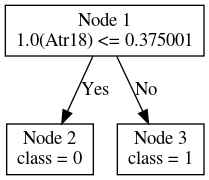

In [21]:
view_tree(decision_tree=oct_tree, feature_names=columns, name="Tree", write_dot=False, write_png=True)
Image(filename = 'Tree.png')

In [ ]:
# Divorced 275x more likely to reply affirmatively to Atr7
married_data=data[data['Class']==0].drop(columns=['Class'])
divorced_data=data[data['Class']==1].drop(columns=['Class'])

## SVM

In [139]:
from sklearn.svm import SVC
# SVC
svc = SVC(C=0.1,kernel = 'linear', random_state = 0,probability=True)
svc.fit(X_train, y_train)
y_predSVC = svc.predict_proba(X_test).T[1]
SVC_score = roc_auc_score(y_test,y_predSVC)   

print('AUC of our custom ensemble on test data is {}'.format(round(SVC_score, 3)))

AUC of our custom ensemble on test data is 0.998


In [140]:
from sklearn.svm import SVC
# SVC
svc = SVC(C=0.1,kernel = 'rbf', random_state = 0,probability=True)
svc.fit(X_train, y_train)
y_predSVC = svc.predict_proba(X_test).T[1]
SVC_score = roc_auc_score(y_test,y_predSVC)   

print('AUC of our custom ensemble on test data is {}'.format(round(SVC_score, 3)))

AUC of our custom ensemble on test data is 1.0
